<a href="https://colab.research.google.com/github/subratamondal1/project_recognizing_handwritten_digits/blob/main/recognizing_handwritten_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📚 Project -- Recognizing Handwritten Digits

## Introduction
We will build a Neural Network that can recognize handwritten numbers. To achieve this goal, we use **MNIST**, a database of handwritten digits made up of a training set of **60,000** examples, and a test set of 10,000 examples. The training examples are annotated by humans with the correct answer. For instance, if the handwritten digit is the number “3,” then 3 is simply the label associated with that example.
* **`Supervised Learning ---`** a type of machine learning that uses labeled data to train a model that can classify data or predict outcomes.
* Each MNIST image is in **grayscale** and consists of **28 x 28** pixels.

## Defining a Simple Neural Network
We start with a very simple neural network and then progressively improve it.

### Import Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from PIL import Image

### Import Dataset

In [2]:
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f"Training Data: {X_train.shape}")
print(f"Testing Data: {X_test.shape}")

Training Data: (60000, 28, 28)
Testing Data: (10000, 28, 28)


### Display Data

Text(0.5, 1.0, '1')

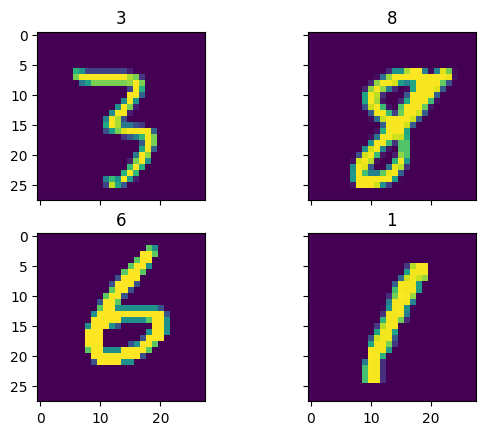

In [3]:
fig, axs = plt.subplots(2, 2, sharey=True, sharex=True)
axs[0,0].imshow(X_train[44])
axs[0,0].set_title(y_train[44])

axs[0,1].imshow(X_train[55])
axs[0,1].set_title(y_train[55])

axs[1,0].imshow(X_train[66])
axs[1,0].set_title(y_train[66])

axs[1,1].imshow(X_train[77])
axs[1,1].set_title(y_train[77])

In [4]:
# Network and Train
EPOCHS = 100
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 # how much TRAIN is reserved for VALIDATION

# X_train is 60000 rows of 28x28 values; we  --> reshape it to 60000 x 784.
RESHAPED = 784 # 28x28 = 784
# the reshaped DATA will have a shape of (60000, 784), where each row is a vector representation of an image.
X_train = X_train.reshape(X_train.shape[0], RESHAPED)
X_test = X_test.reshape(X_test.shape[0], RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize inputs in range [0,1]
X_train /= 255
X_test /= 255

print(X_train.shape[0], "Train Samples")
print(X_test.shape[0], "Test Samples")

# One Hot representation of the data
y_train = keras.utils.to_categorical(y_train, NB_CLASSES)
y_test = keras.utils.to_categorical(y_test, NB_CLASSES)

60000 Train Samples
10000 Test Samples


In [5]:
# Build the model.
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(NB_CLASSES,
            input_shape=(RESHAPED,),
            name='dense_layer',
            activation='softmax'))

In [6]:
# Compiling the model.
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Training the model.
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE, epochs=EPOCHS,
          verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/100
375/375 [==============================] - 4s 7ms/step - loss: 1.3583 - accuracy: 0.6851 - val_loss: 0.8823 - val_accuracy: 0.8317
Epoch 2/100
375/375 [==============================] - 2s 6ms/step - loss: 0.7847 - accuracy: 0.8328 - val_loss: 0.6514 - val_accuracy: 0.8587
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.6393 - accuracy: 0.8511 - val_loss: 0.5585 - val_accuracy: 0.8711
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.5685 - accuracy: 0.8615 - val_loss: 0.5064 - val_accuracy: 0.8768
Epoch 5/100
375/375 [==============================] - 2s 4ms/step - loss: 0.5252 - accuracy: 0.8683 - val_loss: 0.4730 - val_accuracy: 0.8822
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.4953 - accuracy: 0.8734 - val_loss: 0.4493 - val_accuracy: 0.8861
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.4732 - accuracy: 0.8777 - val_loss: 0.4311 - val_accuracy: 0.8916

In [8]:
#evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2885 - accuracy: 0.9204
Test accuracy: 0.9204000234603882
